In [ ]:
pip install pygithub

In [ ]:
pip install july

In [ ]:
pip install pandas

In [ ]:
pip install python-dotenv

In [17]:
import numpy as np
import july
import matplotlib.pyplot as plt
from july.utils import date_range

import pandas as pd
from datetime import date

In [24]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
GITHUB_ACCESS_TOKEN = os.getenv('GITHUB_ACCESS_TOKEN')
GITHUB_REPO = os.getenv('GITHUB_REPO')

#### https://pygithub.readthedocs.io/en/latest/introduction.html
#### https://github.com/jhojin7/HJ_second_brain
from github import Github
g = Github(GITHUB_ACCESS_TOKEN)
repo = g.get_repo(GITHUB_REPO)
master = repo.get_branch("master")
mySHA = master.commit.sha
commits = repo.get_commits(sha=mySHA)

In [ ]:
filtered_commits = []
for c in commits:
    # print(c.message)
    comm = {
        'message' : c.commit.message,
        # 'stats' : c.CommitStats,
        # 'diffCount' : [c.stats.additions,c.stats.deletions,c.stats.total],
        'diff' : c.stats.total,
        'datetime' : c.commit.committer.date,
        'url' : c.commit.html_url
    }
    filtered_commits.append(comm)

In [ ]:
my_df = pd.DataFrame(filtered_commits, columns=['message','diff','datetime','url'])
print(my_df)

In [ ]:
dates = np.array(date_range(date(2022,1,1),date(2022,12,31)))
data = np.array(np.zeros(len(dates)))
july_df = pd.DataFrame({'dates':dates, 'data':data},columns=['dates','data'], dtype=int)
print(july_df['dates'])
print(july_df)

0      2022-01-01
1      2022-01-02
2      2022-01-03
3      2022-01-04
4      2022-01-05
          ...    
360    2022-12-27
361    2022-12-28
362    2022-12-29
363    2022-12-30
364    2022-12-31
Name: dates, Length: 365, dtype: object
          dates  data
0    2022-01-01     0
1    2022-01-02     0
2    2022-01-03     0
3    2022-01-04     0
4    2022-01-05     0
..          ...   ...
360  2022-12-27     0
361  2022-12-28     0
362  2022-12-29     0
363  2022-12-30     0
364  2022-12-31     0

[365 rows x 2 columns]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25452\323338557.py:3: FutureWarning: Could not cast to int32, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  july_df = pd.DataFrame({'dates':dates, 'data':data},columns=['dates','data'], dtype=int)


In [ ]:
# my_df['datetime'][0].date() == july_df['dates'][20]

In [ ]:
####### 커밋 날짜에다가 갯수 +=해주는건데,,, 이거 너무 노가다임. 쉽게 할 수있는거 없나??????????
# my_df.loc[my_df['datetime'].date() == july_df['dates'].date()]
# my_df.loc[:,'datetime'] == july_df[:,'dates']
for i in range(len(my_df['datetime'])):
    for j in range(len(july_df['dates'])):
        if my_df['datetime'][i].date() == july_df['dates'][j]:
            july_df['data'][j] += 1

# for i in my_df.itertuples():
#     for j in july_df.itertuples():
#         if i.datetime.date() == j.dates:
#             j.data += 1
print(july_df)


array([[<AxesSubplot:title={'center':'January'}>,
        <AxesSubplot:title={'center':'February'}>,
        <AxesSubplot:title={'center':'March'}>,
        <AxesSubplot:title={'center':'April'}>],
       [<AxesSubplot:title={'center':'May'}>,
        <AxesSubplot:title={'center':'June'}>,
        <AxesSubplot:title={'center':'July'}>,
        <AxesSubplot:title={'center':'August'}>],
       [<AxesSubplot:title={'center':'September'}>,
        <AxesSubplot:title={'center':'October'}>,
        <AxesSubplot:title={'center':'November'}>,
        <AxesSubplot:title={'center':'December'}>]], dtype=object)

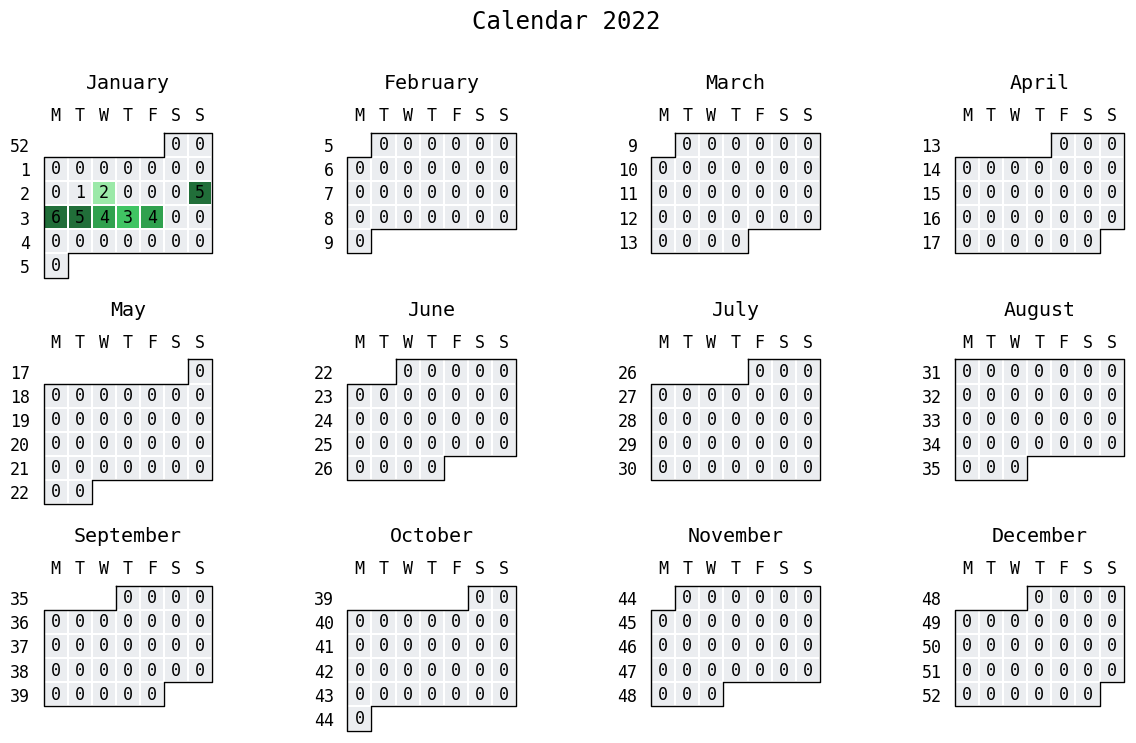

In [ ]:
july.calendar_plot(july_df['dates'],july_df['data'],cmap='github', value_label=True)

In [ ]:
# dates = date_range("2020-01-01", "2020-12-31")
# data = np.random.randint(0, 14, len(dates))
# print(len(dates))
# july.heatmap(dates,data,title='a',cmap='github', value_label=True)